In [1]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Load dataset Tide case
file1 = xr.open_dataset('~/Parameters/Tide_maxhs.nc')
file2 = xr.open_dataset('~/Parameters/Tide_minhs.nc')
file3 = xr.open_dataset('~/Parameters/Tide_maxhs_vel.nc')
file4 = xr.open_dataset('~/Parameters/Tide_minhs_vel.nc')

alp11_1 = file1.alpha11.data
alp11_1[alp11_1<0] = 0
alp22_1 = file1.alpha22.data
Qe1 = file1.Qe.data
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

alp11_2 = file2.alpha11.data
alp11_2[alp11_2<0] = 0
alp22_2 = file2.alpha22.data
Qe2 = file2.Qe.data
Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

ur1 = file3.Ur.data
ur2 = file4.Ur.data


# Weak Tide cases
wfile1 = xr.open_dataset('~/Parameters/wTide_maxhs.nc')
wfile2 = xr.open_dataset('~/Parameters/wTide_minhs.nc')
wfile3 = xr.open_dataset('~/Parameters/wTide_maxhs_vel.nc')
wfile4 = xr.open_dataset('~/Parameters/wTide_minhs_vel.nc')

walp11_1 = wfile1.alpha11.data
walp11_1[walp11_1<0] = 0
walp22_1 = wfile1.alpha22.data
wQe1 = wfile1.Qe.data
wQsm1 = wfile1.Qsm.data
wTsr1 = wfile1.Ts.data / wfile1.Ts_in.data
wTsre1 = wfile1.Ts_e.data / wfile1.Ts_in.data

walp11_2 = wfile2.alpha11.data
walp11_2[walp11_2<0] = 0
walp22_2 = wfile2.alpha22.data
wQe2 = wfile2.Qe.data
wQsm2 = wfile2.Qsm.data
wTsr2 = wfile2.Ts.data / wfile2.Ts_in.data
wTsre2 = wfile2.Ts_e.data / wfile2.Ts_in.data

wur1 = wfile3.Ur.data
wur2 = wfile4.Ur.data

a11_maxhs = np.concatenate([walp11_1,alp11_1[:2]])
a22_maxhs = np.concatenate([walp22_1,alp22_1[:2]])
a11_minhs = np.concatenate([walp11_2,alp11_2[:2]])
a22_minhs = np.concatenate([walp22_2,alp22_2[:2]])

Qe_maxhs = np.concatenate([wQe1,Qe1[:2]])
Qe_minhs = np.concatenate([wQe2,Qe2[:2]])

Tr_maxhs = np.concatenate([wTsre1,Tsre1[:2]])
Tr_minhs = np.concatenate([wTsre2,Tsre2[:2]])

Qsm_maxhs = np.concatenate([wQsm1,Qsm1[:2]])
Qsm_minhs = np.concatenate([wQsm2,Qsm2[:2]])

ur_maxhs = np.concatenate([wur1,ur1[:2]])
ur_minhs = np.concatenate([wur2,ur2[:2]])

In [4]:
file3.Ue.data, wfile3.Ue.data, file4.Ue.data, wfile4.Ue.data

(array([0.0653809 , 0.06543384, 0.06588413, 0.06644081, 0.06656731]),
 array([0.06521616, 0.06510818, 0.06516814]),
 array([0.07473188, 0.07445699, 0.07436979, 0.07447517, 0.07479217]),
 array([0.07462655, 0.07462343, 0.07465914]))

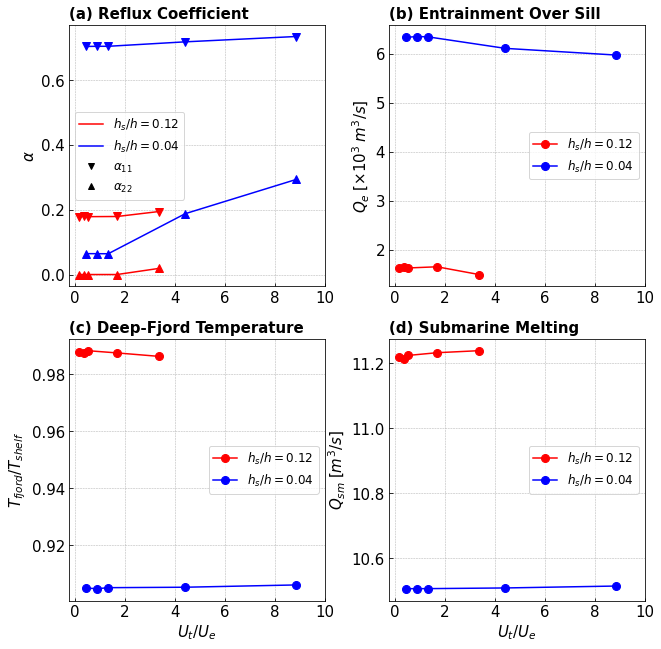

In [5]:
fig1 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)


# Reflux coeff plot
ax1.plot(ur_maxhs/2,a11_maxhs,'^-r', ur_maxhs/2,a22_maxhs,'v-r', ms=8,lw=1.5)
ax1.plot(ur_minhs/2,a11_minhs,'^-b', ur_minhs/2,a22_minhs,'v-b', ms=8,lw=1.5)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=1.5, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=1.5, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='v', linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{11}$', r'$\alpha_{22}$'],
              loc='best', fontsize=12)
ax1.set_xticks([0, 2, 4, 6, 8, 10])
ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_ylabel(r'$\alpha$',size = 15)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title(r'(a) Reflux Coefficient', loc='left', size=15, weight='bold')


# Qe plot
ax2.plot(ur_maxhs/2,Qe_maxhs/1000,'o-r', ur_minhs/2,Qe_minhs/1000,'o-b',ms=8, lw=1.5)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax2.set_xticks([0, 2, 4, 6, 8, 10])
ax2.set_ylabel(r'$Q_e\;[\times10^3\;m^3/s]$',size = 15)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title(r'(b) Entrainment Over Sill', loc='left', size=15, weight='bold')


# T_fjord/T_shelf plot
ax3.plot(ur_maxhs/2,Tr_maxhs,'o-r', ur_minhs/2,Tr_minhs,'o-b',ms=8, lw=1.5)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax3.set_xticks([0, 2, 4, 6, 8, 10])
#ax3.set_xticklabels(['1','2.5','10','25'], size=12)
ax3.set_xlabel(r'$U_t/U_e$',size=15)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size =15)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.tick_params(direction='in', labelsize=15)
ax3.set_title(r'(c) Deep-Fjord Temperature', loc='left', size=15, weight='bold')


# Qsm plot
ax4.plot(ur_maxhs/2,Qsm_maxhs,'o-r', ur_minhs/2,Qsm_minhs,'o-b',ms=8, lw=1.5)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=12)
ax4.set_xticks([0, 2, 4, 6, 8, 10])
ax4.set_xlabel(r'$U_t/U_e$',size = 15)
ax4.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 15)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.tick_params(direction='in', labelsize=15)
ax4.set_title(r'(d) Submarine Melting', loc='left', size=15, weight='bold')
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.2)

In [6]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + '/8-TidalCase.png', dpi=200, bbox_inches='tight') 
